<a href="https://colab.research.google.com/github/Nsimaar99/Nsima-Project/blob/master/My_next.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from collections import OrderedDict
import pandas as pd
import os
import seaborn as sns

In [ ]:
# creating function for maintaining reproducibility

def manual_seed(random_seed: int = 42) -> None:
    '''
    For maintaining reproducibility of a notebook cell.
    '''
    # for non-cuda
    torch.manual_seed(random_seed)
    # in case cuda exists
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_seed)

# creating device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# clearing cache if using GPU
if str(device) == "cuda":
    torch.cuda.empty_cache()

In [ ]:
# Hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 2e-4
EPOCHS = 15

In [ ]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}

# TODO: Using the image datasets and the transforms, define the dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=64, shuffle=False),
    'test': DataLoader(image_datasets['test'], batch_size=64, shuffle=False)
}

# Now you can access the number of classes
num_classes = len(image_datasets['train'].class_to_idx)

print(f"The dataset has {num_classes} classes.")

The dataset has 102 classes.


In [ ]:
import json

def load_label_mapping(json_file_path):
    """
    Load the label mapping from a JSON file and return a dictionary
    that maps class indices to flower names.

    Args:
    json_file_path (str): Path to the JSON file containing the label mapping.

    Returns:
    dict: A dictionary where keys are class indices (as strings) and values are the corresponding flower names.
    """
    with open(json_file_path, 'r') as f:
        cat_to_name = json.load(f)
    return cat_to_name

def get_flower_name(class_index, label_mapping):
    """
    Convert a class index to its corresponding flower name using the label mapping.

    Args:
    class_index (int): The class index of the flower.
    label_mapping (dict): Dictionary mapping class indices to flower names.

    Returns:
    str: The flower name corresponding to the class index.
    """
    return label_mapping.get(str(class_index), "Unknown class")

# Example usage
json_file_path = 'cat_to_name.json'
label_mapping = load_label_mapping(json_file_path)

# Example class indices to test
example_class_indices = [21, 3, 45]

# Map class indices to flower names
flower_names = [get_flower_name(index, label_mapping) for index in example_class_indices]

print(flower_names)  # Outputs the flower names corresponding to the indices


['fire lily', 'canterbury bells', 'bolero deep blue']


In [ ]:
import torch

def get_device():
    """
    Check for CUDA availability and return the appropriate device.

    Returns:
    torch.device: The device to be used for computation (either 'cuda' or 'cpu').
    """
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device('cpu')
        print("Using CPU")
    return device

# Example usage
device = get_device()

Using CPU


In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained ResNet50 model with default weights
model = models.resnet50(weights='DEFAULT')

# Modify the final fully connected layer for your specific number of classes
num_classes = 102  # Update this according to your dataset
model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=0.5),  # Dropout layer with 50% probability
    nn.Linear(in_features=512, out_features=num_classes)
)

# Move model to the device
model.to(device)

# Define the criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Only parameters of the classifier (not the frozen layers) should be updated
optimizer = optim.Adam(model.fc.parameters(), lr=2e-4)

# Print the model architecture to verify
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:

# Define the number of epochs
epochs = 15
steps = 0
running_loss = 0
print_every = 20

# Training loop
for epoch in range(epochs):
    for inputs, labels in dataloaders['train']:  # Use dataloaders['train']
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.type(torch.long).to(device)

        optimizer.zero_grad()
        # Forward pass
        logps = model(inputs)
        loss = criterion(logps, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            test_loss = 0
            accuracy = 0
            # Use dataloaders['test'] here
            for inputs, labels in dataloaders['test']:  # Use dataloaders['test']
                inputs, labels = inputs.to(device), labels.to(device)  # Move to device
                logps = model(inputs)
                loss = criterion(logps, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor))

            print(f"Epoch {epoch+1}/{epochs}.."
                  f"Train loss: {running_loss/print_every:.3f}.."
                  f"Test loss: {test_loss/len(dataloaders['test']):.3f}.."
                  f"Test accuracy: {accuracy/len(dataloaders['test']):.3f}..")

Epoch 1/15..Train loss: 4.583..Test loss: 4.520..Test accuracy: 0.076..
Epoch 1/15..Train loss: 9.038..Test loss: 4.350..Test accuracy: 0.099..
Epoch 1/15..Train loss: 13.312..Test loss: 4.140..Test accuracy: 0.162..
Epoch 1/15..Train loss: 17.391..Test loss: 3.906..Test accuracy: 0.240..
Epoch 1/15..Train loss: 21.256..Test loss: 3.647..Test accuracy: 0.319..
Epoch 2/15..Train loss: 24.788..Test loss: 3.373..Test accuracy: 0.359..
Epoch 2/15..Train loss: 28.084..Test loss: 3.106..Test accuracy: 0.399..
Epoch 2/15..Train loss: 31.140..Test loss: 2.854..Test accuracy: 0.451..
Epoch 2/15..Train loss: 33.972..Test loss: 2.625..Test accuracy: 0.498..
Epoch 2/15..Train loss: 36.598..Test loss: 2.388..Test accuracy: 0.564..
Epoch 3/15..Train loss: 38.917..Test loss: 2.201..Test accuracy: 0.582..
Epoch 3/15..Train loss: 41.162..Test loss: 2.011..Test accuracy: 0.624..
Epoch 3/15..Train loss: 43.220..Test loss: 1.867..Test accuracy: 0.663..
Epoch 3/15..Train loss: 45.089..Test loss: 1.724..Tes

In [ ]:
import torch
import os

def save_checkpoint(model, optimizer, epoch, loss, checkpoint_path='checkpoint.pth'):
    # Ensure the directory exists
    checkpoint_dir = os.path.dirname(checkpoint_path)
    if not os.path.exists(checkpoint_dir) and checkpoint_dir:
        os.makedirs(checkpoint_dir)

    # Create the checkpoint dictionary
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }

    # Save the checkpoint
    torch.save(checkpoint, checkpoint_path)
    print(f'Checkpoint saved to {checkpoint_path}')



In [ ]:
# Define the path to save the checkpoint
checkpoint_path = 'checkpoints/my_model.pth'

In [ ]:
# Define the path to save the checkpoint
checkpoint_path = 'checkpoints/my_model.pth'

# Use the last epoch and loss from training or set them accordingly
# Since epoch_loss is not available in this scope, set a value for loss
save_checkpoint(model, optimizer, epoch=15, loss=0.0, checkpoint_path=checkpoint_path)

Checkpoint saved to checkpoints/my_model.pth


In [ ]:
import torch

def load_checkpoint(checkpoint_path, model, optimizer=None):
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path)

    # Load model state dict
    model.load_state_dict(checkpoint['model_state_dict'])

    # If an optimizer is provided, load its state dict as well
    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Load additional training information
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    print(f'Checkpoint loaded from {checkpoint_path} (epoch {epoch}, loss {loss})')

    return model, optimizer, epoch, loss

In [ ]:
# Define the same checkpoint path used for saving
checkpoint_path = 'checkpoints/my_model.pth'

# Assuming you have already defined your model and optimizer
model, optimizer, epoch, loss = load_checkpoint(checkpoint_path, model, optimizer)

# Now model, optimizer, epoch, and loss will have the states from the saved checkpoint


Checkpoint loaded from checkpoints/my_model.pth (epoch 15, loss 0.0)


<ipython-input-17-a7c205d15285>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


In [ ]:
# Download the image of a flower
url = 'https://images.pexels.com/photos/56866/garden-rose-red-pink-56866.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'  # Flower image URL
response = requests.get(url, stream=True)
response.raise_for_status()

# Save the downloaded image as 'downloaded_image.jpg'
with open('downloaded_image.jpg', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print("Flower image downloaded successfully!")

# Step 2: Process the image
# Assign the image path to the variable
image_path = 'downloaded_image.jpg' # define the variable image_path

# Load the image
image = Image.open(image_path).convert('RGB')

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),         # Resize to 224x224
    transforms.CenterCrop(224),            # Center crop to 224x224
    transforms.ToTensor(),                 # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations
image_tensor = transform(image)

# Print tensor shape
print(f'Processed image tensor shape: {image_tensor.shape}')



Flower image downloaded successfully!
Processed image tensor shape: torch.Size([3, 224, 224])


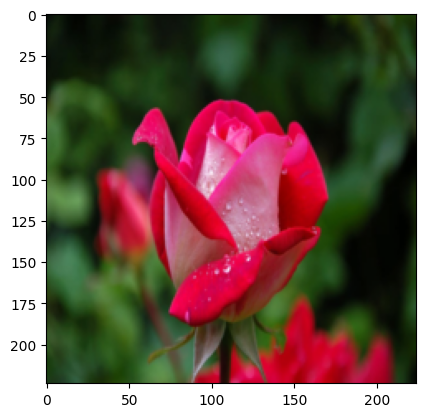

In [ ]:
# Step 3: Display the processed image
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # Set title if provided
    if title:
        ax.set_title(title)

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes the color channel is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing: multiply by standard deviation and add the mean
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip values between 0 and 1 to ensure valid display range
    image = np.clip(image, 0, 1)

    # Show the image
    ax.imshow(image)

    return ax

# Step 4: Display the image
imshow(image_tensor)
plt.show()  # Ensure the image is displayed

In [ ]:
def predict(image_path, model, topk=5, device='cuda'):
    '''
    Predict the class (or classes) of an image using a trained deep learning model.
    Arguments:
        image_path (str): Path to the input image.
        model (torch.nn.Module): The trained model used for predictions.
        topk (int): The number of top predictions to return. Default is 5.
        device (str): The device to use ('cuda' or 'cpu'). Default is 'cuda'.
    Returns:
        top_probabilities (list): List of top-K probabilities.
        top_classes (list): List of top-K predicted class indices.
    '''

    # Set the model to evaluation mode
    model.eval()

    # Move the model to the specified device
    model.to(device)

    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((256, 256)),         # Resize to 256x256
        transforms.CenterCrop(224),            # Center crop to 224x224
        transforms.ToTensor(),                 # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Make prediction with no gradient calculation
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        top_probabilities, top_classes = torch.topk(probabilities, topk)

    # Convert probabilities and classes to lists
    top_probabilities = top_probabilities.cpu().numpy().flatten().tolist()
    top_classes = top_classes.cpu().numpy().flatten().tolist()

    return top_probabilities, top_classes

In [ ]:
# Assuming you have a trained model loaded and moved to the appropriate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.resnet50(pretrained=False)


# Path to the image you want to predict
image_path = 'downloaded_image.jpg'

# Get the top 5 predicted classes and their probabilities
probabilities, classes = predict(image_path, model, topk=5, device=device)

print("Top Probabilities:", probabilities)
print("Top Classes:", classes)

NameError: name 'torch' is not defined

In [ ]:
# Define your functions here
def load_label_mapping(json_file_path):
    """Load the label mapping from a JSON file and return a dictionary."""
    with open(json_file_path, 'r') as f:
        cat_to_name = json.load(f)
    return cat_to_name

def get_flower_name(class_index, label_mapping):
    """Convert a class index to its corresponding flower name using the label mapping."""
    return label_mapping.get(str(class_index), "Unknown class")


In [ ]:
import matplotlib.pyplot as plt

def plot_topk_probabilities(probabilities, class_names):
    """
    Plot the top K probabilities as a bar graph.

    Arguments:
        probabilities (list): List of top K probabilities.
        class_names (list): List of top K class names.
    """
    # Check that probabilities and class names are of the same length
    assert len(probabilities) == len(class_names), "Probabilities and class names lists must have the same length."

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(class_names, probabilities, color='skyblue')
    plt.xlabel('Probability')
    plt.title('Top 5 Predicted Classes')
    plt.gca().invert_yaxis()  # Invert y axis to have the highest probability on top
    plt.show()

# Example usage
image_path = 'downloaded_image.jpg'

# Get the top 5 predicted classes and their probabilities
probabilities, class_names = predict(image_path, model, topk=5, device=device)

# Plot the top 5 probabilities
plot_topk_probabilities(probabilities, class_names)


NameError: name 'predict' is not defined

In [ ]:
# Get the top 5 predicted classes and their probabilities
probabilities, class_indices = predict(image_path, model, topk=5, device=device)

# Print class indices
print(f"Class indices: {class_indices}")

# Load label mapping
json_file_path = 'cat_to_name.json'
label_mapping = load_label_mapping(json_file_path)

# Convert class indices to class names
top_class_names = [get_flower_name(idx, label_mapping) for idx in class_indices]

# Print class names
print(f"Class names: {top_class_names}")


NameError: name 'model' is not defined